In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_pickle('merged_data.pkl')
#conda activate wp

In [ ]:
data.describe()
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027106 entries, 0 to 11027105
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transcript_id        object 
 1   transcript_position  int64  
 2   sequence             object 
 3   dwell_time           float64
 4   sd                   float64
 5   mean                 float64
 6   m1_seq               object 
 7   m1_dtime             float64
 8   m1_sd                float64
 9   m1_mean              float64
 10  p1_seq               object 
 11  p1_dtime             float64
 12  p1_sd                float64
 13  p1_mean              float64
 14  gene_id              object 
 15  label                int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 1.3+ GB


,transcript_id,transcript_position,sequence,dwell_time,sd,mean,m1_seq,m1_dtime,m1_sd,m1_mean,p1_seq,p1_dtime,p1_sd,p1_mean,gene_id,label
0,ENST00000000233,244,AGACC,0.01770,10.40,122.0,AAGAC,0.00299,2.06,125.0,GACCA,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AGACC,0.00844,4.67,126.0,AAGAC,0.00631,2.53,125.0,GACCA,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AGACC,0.01360,12.00,124.0,AAGAC,0.00465,3.92,109.0,GACCA,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AGACC,0.00830,5.01,130.0,AAGAC,0.00398,2.06,125.0,GACCA,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AGACC,0.00266,3.94,129.0,AAGAC,0.00664,2.92,120.0,GACCA,0.01300,7.15,82.2,ENSG00000004059,0




#some questions to be answered:

Basic counts: 

1. which sequences have the highest counts? 

2. which transcript_positions have the highest counts?

3. which gene_ids have the highest counts of label1? 

4. can we get a heatmap to see what are the relationships among the predictors? 



About sequences:

1. how many are there? 

2. Compare the mean dwell time&other metrics? 
    is there any relationship between? 

3. what is the proportion of modification? 



About modified vs unmodified: 

what are the metric differences at -1, 0, 1? 







Which sequences have highest counts? 

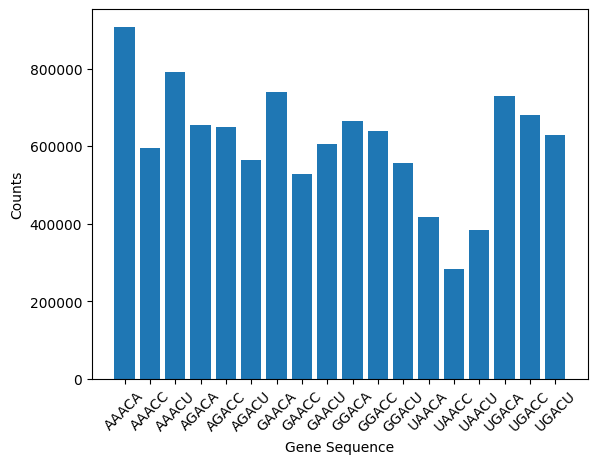

In [6]:
sequence_groups = data.groupby('sequence')
sequence_stats = sequence_groups.size().reset_index(name='counts')
plt.bar(sequence_stats['sequence'], sequence_stats['counts'])
plt.xlabel('Gene Sequence')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Which transcript positions have the highest counts? 

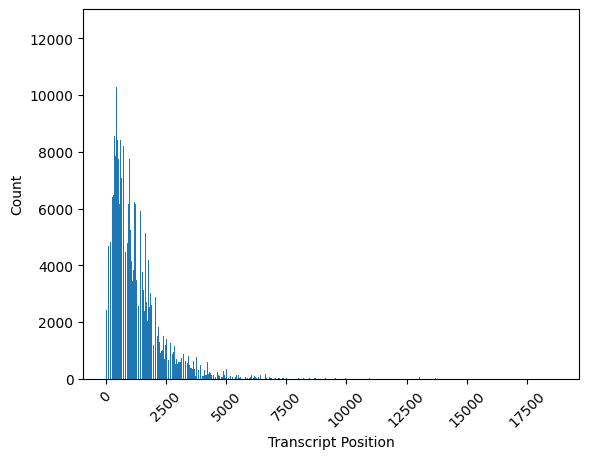

In [7]:
transcript_groups = data.groupby('transcript_position')
transcript_stats = transcript_groups.size().reset_index(name='counts')
plt.bar(transcript_stats['transcript_position'], transcript_stats['counts'])
plt.xlabel('Transcript Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show() 

Geneid: proportion of modification

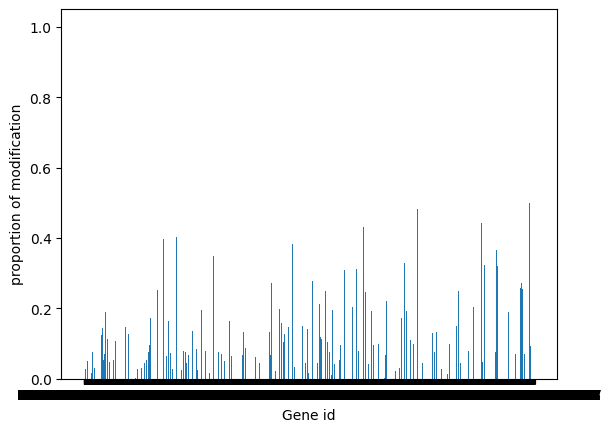

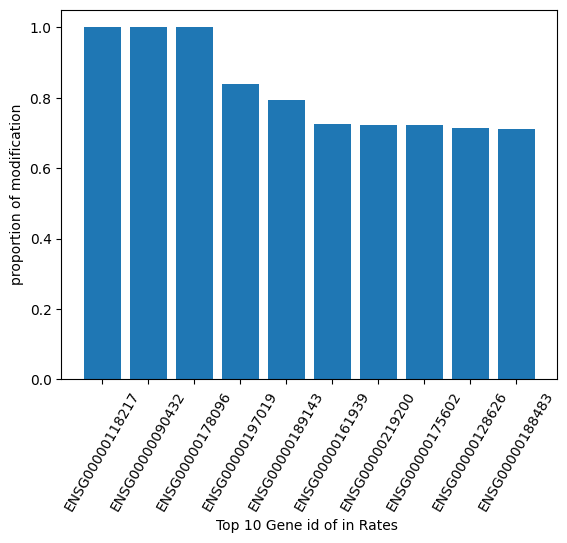

In [9]:

gene_id_groups = data.groupby(['gene_id'])
#gene_label_sum=gene_id_groups.sum('label')

#General view: high rate is nearly 0.5 of the total transcripts in the sample: 
gene_id_rate=gene_id_groups['label'].mean().reset_index(name='rate')
plt.bar(gene_id_rate['gene_id'],gene_id_rate['rate'])
plt.xlabel('Gene id')
plt.ylabel('proportion of modification')
plt.xticks(rotation=0)
plt.Figure(figsize=(12,8))
plt.show() 

#Next see which are the highest ones. 
top10_gene_id=gene_id_rate.sort_values("rate",ascending=False).head(10)
plt.bar(top10_gene_id['gene_id'],top10_gene_id['rate'])
plt.xlabel('Top 10 Gene id of in Rates ')
plt.ylabel('proportion of modification')
plt.xticks(rotation=60)
plt.Figure(figsize=(12,8))
plt.show() 
#top 10 rates of geneiid


In [4]:
#Too large to run
hm=sns.heatmap(data=data.select_dtypes(exclude=['object']),annot=True)
plt.show()

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
sequences_groups = data.groupby(['sequence'])
means=sequences_groups[['dwell_time','mean','sd']].mean()
variances=sequences_groups[['dwell_time','mean','sd']].std()
means.join(variances,lsuffix='_average',rsuffix='_std')

,dwell_time_average,mean_average,sd_average,dwell_time_std,mean_std,sd_std
sequence,,,,,,
AAACA,0.007286,98.897004,3.194698,0.004971,3.592200,1.091762
AAACC,0.007393,99.325321,3.857418,0.005178,4.135226,1.162979
AAACU,0.007920,106.276290,2.988237,0.005369,3.833956,1.081997
AGACA,0.009821,126.456904,6.194353,0.005897,3.685578,2.632951
AGACC,0.010078,127.517235,5.810098,0.006125,3.085174,2.606831
AGACU,0.009765,130.912945,5.294832,0.005705,3.541713,2.328849
GAACA,0.007740,96.044041,3.366168,0.004706,3.110009,1.673392
GAACC,0.007339,94.935531,3.989337,0.004367,3.286348,1.499374
GAACU,0.007461,101.007708,3.480076,0.004613,3.013879,1.695600


<Figure size 1200x800 with 0 Axes>

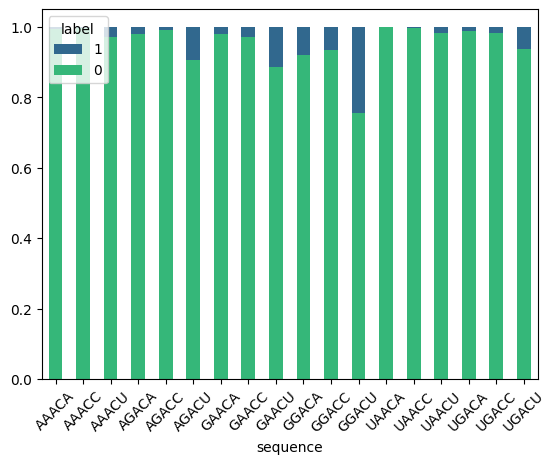

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Assuming you have a DataFrame named data
# Group by 'sequence' and count the normalized value counts for each 'label'
grouped_data = data.groupby('sequence')['label'].value_counts(normalize=True).unstack('label')

# Reverse the order of hues in the color palette
reverse_palette = sns.color_palette("viridis", len(grouped_data.columns))[::-1]

# Plot the stacked bar plot with the reversed palette
ax = grouped_data.plot.bar(stacked=True, color=reverse_palette)

plt.xticks(rotation=45)

# Get the original handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed order
plt.legend(handles, labels, title='label', loc='upper left')

plt.show()


Numerical features comparison among the sequences: 

   sequence  dwell_time_average  mean_average  sd_average  dwell_time_std  \
0     AAACA            0.007286     98.897004    3.194698        0.004971   
1     AAACC            0.007393     99.325321    3.857418        0.005178   
2     AAACU            0.007920    106.276290    2.988237        0.005369   
3     AGACA            0.009821    126.456904    6.194353        0.005897   
4     AGACC            0.010078    127.517235    5.810098        0.006125   
5     AGACU            0.009765    130.912945    5.294832        0.005705   
6     GAACA            0.007740     96.044041    3.366168        0.004706   
7     GAACC            0.007339     94.935531    3.989337        0.004367   
8     GAACU            0.007461    101.007708    3.480076        0.004613   
9     GGACA            0.008800    118.104313    7.369484        0.006113   
10    GGACC            0.009178    119.877645    7.124274        0.006322   
11    GGACU            0.009176    123.010655    5.707834        0.005785   

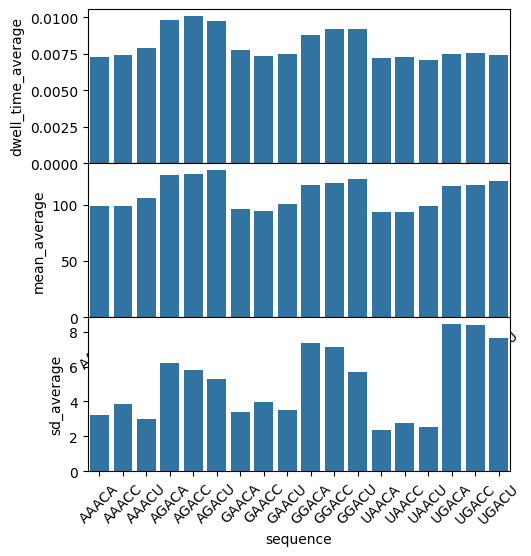

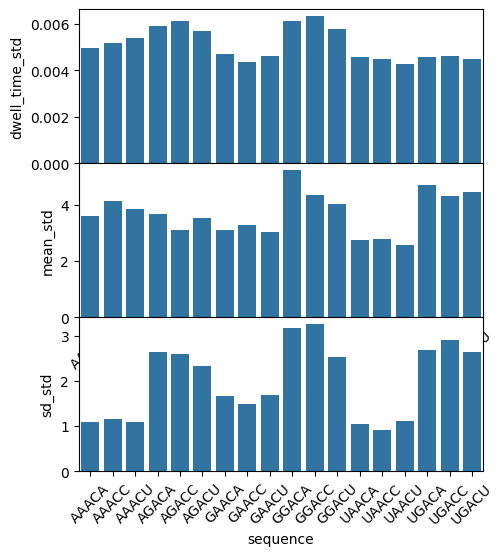

In [15]:

from matplotlib import gridspec

# Create a custom color palette for the labels
sequences_groups = data.groupby(['sequence'])
means=sequences_groups[['dwell_time','mean','sd']].mean()
variances=sequences_groups[['dwell_time','mean','sd']].std()
joined_data=means.join(variances,lsuffix='_average',rsuffix='_std').reset_index()
print(joined_data)
# Create a figure and gridspec

fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(3, 2, height_ratios=[3, 3, 3], width_ratios=[2, 2])
ax0 = plt.subplot(gs[0,0])
sns.barplot(x='sequence',y='dwell_time_average',data=joined_data)
plt.xticks(rotation=45)

ax1 = plt.subplot(gs[1,0])
sns.barplot(x='sequence',y='mean_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax2 = plt.subplot(gs[2,0])
sns.barplot(x='sequence',y='sd_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0)
plt.show()

fig = plt.figure(figsize=(12, 6)) 
ax3 = plt.subplot(gs[0,1])
sns.barplot(x='sequence',y='dwell_time_std',data=joined_data)
plt.xticks(rotation=45)

ax4 = plt.subplot(gs[1,1])
sns.barplot(x='sequence',y='mean_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax5 = plt.subplot(gs[2,1])
sns.barplot(x='sequence',y='sd_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0, wspace=0.3)
plt.show()


Numerical features comparison between Label 0 and 1: 

Position 0: 

/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/1574171692.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="mean",data=data,palette=colors)
/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/1574171692.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="sd",data=data,palette=colors)
/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/1574171692.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="dwell_time",data=data,palette=colors)


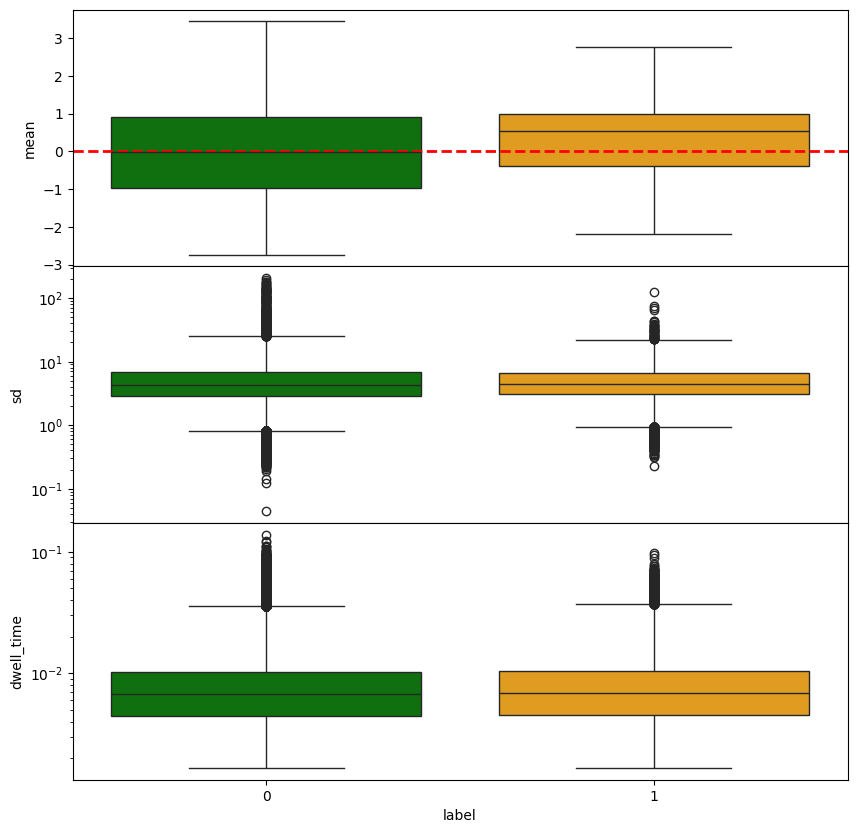

In [38]:
from matplotlib import gridspec

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['mean', 'p1_mean', 'm1_mean']] = scaler.fit_transform(data[['mean', 'p1_mean', 'm1_mean']])
# Fit and transform the relevant columns

colors = {"1": "orange", "0": "green"}
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3,1,height_ratios=[2, 2, 2])
ax0=plt.subplot(gs[0])
sns.boxplot(x="label",y="mean",data=data,palette=colors)
ax0.axhline(y=0, color='red', linestyle='--', linewidth=2)
#gs[0]=sns.boxplot(x="label",y="mean",data=data)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_yscale("log")
sns.boxplot(x="label",y="sd",data=data,palette=colors)
plt.setp(ax0.get_xticklabels(), visible=False)

ax2 = plt.subplot(gs[2], sharex = ax0)
ax2.set_yscale("log")
sns.boxplot(x="label",y="dwell_time",data=data,palette=colors)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.show()


Position Minus 1: 

/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/3758888041.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="m1_mean",data=data,palette=colors)
/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/3758888041.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="m1_sd",data=data,palette=colors)
/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/3758888041.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="m1_dtime",data=data,palette=colors)


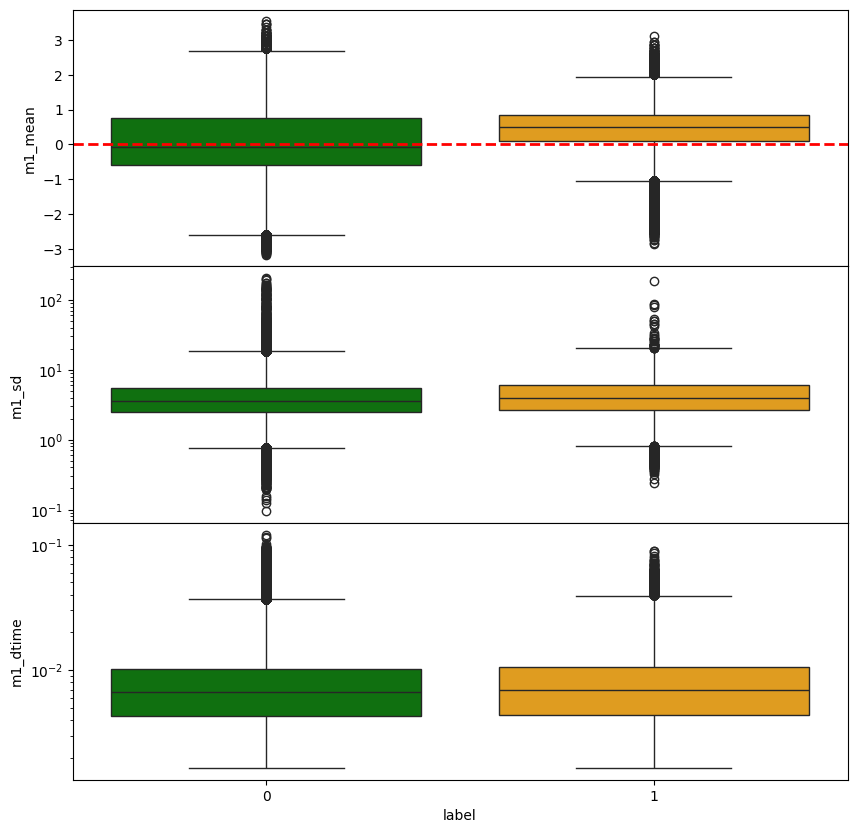

In [39]:
from matplotlib import gridspec

colors = {"1": "orange", "0": "green"}
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3,1,height_ratios=[2, 2, 2])
ax0=plt.subplot(gs[0])
sns.boxplot(x="label",y="m1_mean",data=data,palette=colors)
ax0.axhline(y=0, color='red', linestyle='--', linewidth=2)
#gs[0]=sns.boxplot(x="label",y="mean",data=data)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_yscale("log")
sns.boxplot(x="label",y="m1_sd",data=data,palette=colors)
plt.setp(ax0.get_xticklabels(), visible=False)

ax2 = plt.subplot(gs[2], sharex = ax0)
ax2.set_yscale("log")
sns.boxplot(x="label",y="m1_dtime",data=data,palette=colors)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.show()

Position plus 1: 

/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/899748473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="p1_mean",data=data,palette=colors)
/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/899748473.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="p1_sd",data=data,palette=colors)
/var/folders/8p/0v9xh23s7kn5d1g1xb5jc1vr0000gn/T/ipykernel_25722/899748473.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label",y="p1_dtime",data=data,palette=colors)


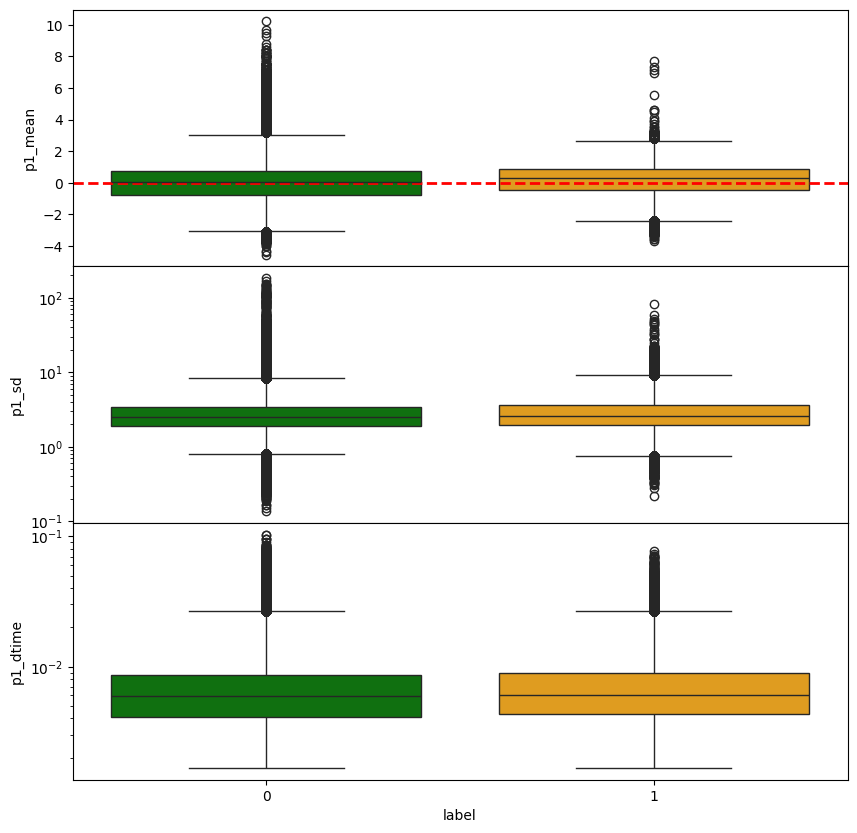

In [40]:
from matplotlib import gridspec

colors = {"1": "orange", "0": "green"}
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3,1,height_ratios=[2, 2, 2])
ax0=plt.subplot(gs[0])
sns.boxplot(x="label",y="p1_mean",data=data,palette=colors)
ax0.axhline(y=0, color='red', linestyle='--', linewidth=2)
#gs[0]=sns.boxplot(x="label",y="mean",data=data)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_yscale("log")
sns.boxplot(x="label",y="p1_sd",data=data,palette=colors)
plt.setp(ax0.get_xticklabels(), visible=False)

ax2 = plt.subplot(gs[2], sharex = ax0)
ax2.set_yscale("log")
sns.boxplot(x="label",y="p1_dtime",data=data,palette=colors)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.show()